**Introduction**

Problem Statement

To perform exploratory text analysis on the provided transcript dataset to service meaningful insights.

Analysis Aim and Objectives:

The goal of this analysis is to determine whether the type of radio station and its intended audience location will cause any side effects within the content discussed that can be located within the transcripts.

Furthermore, differences between national radio and commercial radio will be explored, to determine if there are any major differences between national radio and commercial radio in regards to what language they use.


**Preprocessing**

Overview

The dataset contains a collection of 29 plain text files that are transcripts of Australian Radio Talk. 14 Transcribed recordings of the talkback are from National Radio broadcasts such as ABC National Radio, ABC Radio Broadcasts to Eastern Australia, Southern Australia and Western Australia. There are also 15 transcribed recordings that are from commercial stations broadcasted to Eastern, Southern and Western Australia.


In [85]:
import os
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

folder_path = 'AT1 dataset_AusRadioTalkback'
data = []


for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            data.append({'filename': filename, 'content': content})


df = pd.DataFrame(data)
print(df)


                     filename  \
0   1_Dataset Description.txt   
1             ABCE1-plain.txt   
2             ABCE2-plain.txt   
3             ABCE3-plain.txt   
4             ABCE4-plain.txt   
5            ABCNE1-plain.txt   
6            ABCNE2-plain.txt   
7             COME1-plain.txt   
8             COME2-plain.txt   
9             COME3-plain.txt   
10            COME4-plain.txt   
11            COME5-plain.txt   
12            COME6-plain.txt   
13            COME7-plain.txt   
14            COME8-plain.txt   
15           COMNE1-plain.txt   
16           COMNE2-plain.txt   
17           COMNE3-plain.txt   
18           COMNE4-plain.txt   
19           COMNE5-plain.txt   
20           COMNE6-plain.txt   
21           COMNE7-plain.txt   
22             NAT1-plain.txt   
23             NAT2-plain.txt   
24             NAT3-plain.txt   
25             NAT4-plain.txt   
26             NAT5-plain.txt   
27             NAT6-plain.txt   
28             NAT7-plain.txt   
29        

**Cleaning**

To start, all code was loaded into a dataframe and set up with a text processing function. The order of the preprocessing is as follows:

1. Spaces were all added after parenthesis to create consistency for tokenizing.
2. Hyphens were all converted to spaces, to allow tokenization to be done correctly. Without this, hyphens were getting removed and whenever they were used, words were being combined together without spaces separating them.
3. Punctuation was removed. This includes: Quotations, eclipses, quotes and hyphens.
4. All the text was turned to lowercase for text consistency.
5. All stop words were removed. Multiple tests with different stopwords were done. This included removing all common words that didn't provide any context, removing no words, removing strange artefacts of the tokenisation such as “c”, “ih”, “n”.
6. Finally all words were turned into their stem forms using the nltk.stem library's built in functions.


In [87]:
#Modified code from Lab 2 Part 2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
from nltk import pos_tag
from nltk.util import bigrams, trigrams

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

class TextPreprocessor:
    def __init__(self, custom_punctuation=None, custom_stopwords=None):
        self.punctuation = string.punctuation
        if custom_punctuation:
            self.punctuation += custom_punctuation

        self.stop_words = set(stopwords.words('english'))
        if custom_stopwords:
            self.stop_words.update(custom_stopwords)

        self.stemmer = PorterStemmer()

    def remove_punctuation(self, text):
        return ''.join([char for char in text if char not in self.punctuation])

    def add_space_after_parenthesis(self, text):
        return re.sub(r'\)', ') ', text)

    def hyphen_to_space(self, text):
        return re.sub(r'\-', ' ', text)

    def to_lowercase(self, text):
        return text.lower()

    def remove_stopwords(self, text):
        words = word_tokenize(text)
        return ' '.join([word for word in words if word not in self.stop_words])
        
    def stem_words(self, text):
        words = word_tokenize(text)
        return ' '.join([self.stemmer.stem(word) for word in words])

    # https://www.nltk.org/book/ch05.html nouns tags found here
    def keep_pos_tag(self, text, tag): #tag is a dictionary eg {"NN", NNP"}
        words = word_tokenize(text)
        return ' '.join([word for word, pos in pos_tag(words) if pos in tag]) 
        

    #Order matters - how you call these methods is how the text will be processed step-by-step
    def preprocess(self, text):
        text = self.add_space_after_parenthesis(text)
        text = self.hyphen_to_space(text)
        text = self.remove_punctuation(text)
        text = self.to_lowercase(text)
        text = self.remove_stopwords(text)
        text = self.stem_words(text)
        return text

    
    def preprocess_keep_pos_tag(self, text, tag):
        text = self.add_space_after_parenthesis(text)
        text = self.hyphen_to_space(text)
        text = self.remove_punctuation(text)
        text = self.to_lowercase(text)
        text = self.remove_stopwords(text)
        text = self.keep_pos_tag(text, tag)
        text = self.stem_words(text)
        return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mason\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [88]:
print(df)

                     filename  \
0   1_Dataset Description.txt   
1             ABCE1-plain.txt   
2             ABCE2-plain.txt   
3             ABCE3-plain.txt   
4             ABCE4-plain.txt   
5            ABCNE1-plain.txt   
6            ABCNE2-plain.txt   
7             COME1-plain.txt   
8             COME2-plain.txt   
9             COME3-plain.txt   
10            COME4-plain.txt   
11            COME5-plain.txt   
12            COME6-plain.txt   
13            COME7-plain.txt   
14            COME8-plain.txt   
15           COMNE1-plain.txt   
16           COMNE2-plain.txt   
17           COMNE3-plain.txt   
18           COMNE4-plain.txt   
19           COMNE5-plain.txt   
20           COMNE6-plain.txt   
21           COMNE7-plain.txt   
22             NAT1-plain.txt   
23             NAT2-plain.txt   
24             NAT3-plain.txt   
25             NAT4-plain.txt   
26             NAT5-plain.txt   
27             NAT6-plain.txt   
28             NAT7-plain.txt   
29        

In [89]:
#Remove first entry (the dataset description)
df = df.iloc[1:]

In [90]:
df

,filename,content
1,ABCE1-plain.txt,Thanks for that John Hall now John Hall will ...
2,ABCE2-plain.txt,Ah look l Les Pete.\n.\n Simon.\n G'day Peto....
3,ABCE3-plain.txt,If you haven't been with us before this how i...
4,ABCE4-plain.txt,Uh blue-tongues'd be unlikely to eat them be...
5,ABCNE1-plain.txt,A very good afternoon to you Roly.\n Good aft...
6,ABCNE2-plain.txt,And Greg Kerrin is my guest. Hello Greg.\n G'...
7,COME1-plain.txt,Good morning and welcome to another Two G B w...
8,COME2-plain.txt,Good morning everyone and welcome to a very f...
9,COME3-plain.txt,The doctor is in the lines are open one-three...
10,COME4-plain.txt,Morning Mark.\n\n Uh uh good morning John. Um...


In [91]:
#Code that combines all the different df rows based on filename into 1 long string grouped by radio Station

#Create prefix column using regex (take characters from beginning of filename, until you hit a number)
df['prefix'] = df['filename'].apply(lambda x: re.match(r'^[A-Z]+', x).group())

#Group by prefix
df_combined = df.groupby('prefix')['content'].apply(' '.join).reset_index()

In [92]:
df_combined

,prefix,content
0,ABCE,Thanks for that John Hall now John Hall will ...
1,ABCNE,A very good afternoon to you Roly.\n Good aft...
2,COME,Good morning and welcome to another Two G B w...
3,COMNE,Freo Dockers skipper there Peter Bell hello e...
4,NAT,One-eight-hundred-eight-oh-two-three-four-one...


In [93]:
# Get word frequencies
def get_word_frequencies(text, top_n=10):
    words = word_tokenize(text)
    word_freq = Counter(words)
    return word_freq.most_common(top_n)

def get_word_freq_percentage(text, top_n=20):
    words = word_tokenize(text)
    word_freq = Counter(words)
    return [(word, round((count / len(words) * 100), 2)) for word, count in word_freq.most_common(top_n)]

In [94]:
#testing without stop words
custom_punctuation = "''""…""...""``" '"' '-'  # Add any custom punctuation marks here
custom_stopwords = ["n", "c", "ih", "w"] 
preprocessor = TextPreprocessor(custom_punctuation, custom_stopwords)
word_freqs = {}

for index, row in df_combined.iterrows():
    processed = preprocessor.preprocess(row['content'])
    word_freqs[row['prefix']] = get_word_frequencies(processed, top_n=50)

# Combine word frequencies into a DataFrame
df_word_freqs = pd.DataFrame(word_freqs).fillna(0)

In [95]:
df_word_freqs

,ABCE,ABCNE,COME,COMNE,NAT
0,"(uh, 580)","(uh, 179)","(uh, 1207)","(uh, 1259)","(uh, 1877)"
1,"(um, 286)","(um, 68)","(um, 647)","(um, 512)","(um, 1186)"
2,"(yeah, 232)","(one, 66)","(well, 644)","(yeah, 365)","(think, 553)"
3,"(well, 200)","(okay, 56)","(yeah, 466)","(well, 332)","(yknow, 516)"
4,"(like, 167)","(well, 50)","(got, 435)","(one, 299)","(well, 400)"
5,"(ye, 166)","(ye, 50)","(like, 433)","(that, 291)","(like, 398)"
6,"(that, 146)","(that, 48)","(good, 423)","(go, 278)","(yeah, 383)"
7,"(get, 139)","(good, 47)","(oh, 412)","(got, 273)","(peopl, 379)"
8,"(oh, 133)","(got, 47)","(that, 409)","(get, 264)","(one, 350)"
9,"(think, 130)","(like, 41)","(go, 396)","(like, 230)","(go, 349)"


**Exploratory Data Analysis**

**Starting with common words analysis (Minimal Stop Words used):**

Above is a list of all most frequent words separated by the different radio stations. The most common words across all radio stations are the same, with filler words such as “uh” and “um” substantially beating out the rest of the word counts significantly. Despite the extremely large amount of use of these filler words, they don't contribute anything significant (ranging from 2.98% to 4.41% of the total word count) to the total distribution of the words within the transcriptions.

From an initial glance, standouts include “yknow” which is a common Australian shorthand for “you know” and is an extremely common use of colloquial language in Australia in general. From the word count table, we can see that it is the **4th** most common word for the National Australia Radio (NAT), ranked **14th** for commercial stations broadcasting to the Southern and Western side of Australia (COMNE) and Ranked **39th** for Commercial Eastern Australian Radio (COME). Finally it is ranked **34th** for Eastern ABC Radio (ABCE) and does not appear within the top 20 for Southern and Western Australia. This use of colloquial language is further enforced with the use of “gunna” which can be seen in the word cloud for NAT that consists of only nouns (see next page).

As “yknow” and “gunna” is considered colloquial language, it is commonly used to allow the listener to relate as “it's the same language as what the listener may use themselves”, this allows the listener to become more invested in the chatter as it sounds like a conversation between a group of friends and this mentality allows the radio cast to benefit from more relatability and hence have more listeners. As the ABC National Radio is Australia-wide, this could be a side affect of having a more diverse cast talking on the radio, with people from all backgrounds both professional and casual, resulting in more inclusive and casual language used to appeal to as wide an audience as possible.


In [97]:
#Lets get the word frequency as a % of total words 
word_freqs_percentage = {}
for index, row in df_combined.iterrows():
    processed = preprocessor.preprocess(row['content'])
    word_freqs_percentage[row['prefix']] = get_word_freq_percentage(processed, top_n=50)

# Combine word frequencies into a DataFrame
df_word_freq_percentage = pd.DataFrame(word_freqs_percentage).fillna(0)

In [98]:
df_word_freq_percentage

,ABCE,ABCNE,COME,COMNE,NAT
0,"(uh, 3.79)","(uh, 3.68)","(uh, 2.98)","(uh, 4.41)","(uh, 4.37)"
1,"(um, 1.87)","(um, 1.4)","(um, 1.59)","(um, 1.79)","(um, 2.76)"
2,"(yeah, 1.52)","(one, 1.36)","(well, 1.59)","(yeah, 1.28)","(think, 1.29)"
3,"(well, 1.31)","(okay, 1.15)","(yeah, 1.15)","(well, 1.16)","(yknow, 1.2)"
4,"(like, 1.09)","(well, 1.03)","(got, 1.07)","(one, 1.05)","(well, 0.93)"
5,"(ye, 1.08)","(ye, 1.03)","(like, 1.07)","(that, 1.02)","(like, 0.93)"
6,"(that, 0.95)","(that, 0.99)","(good, 1.04)","(go, 0.97)","(yeah, 0.89)"
7,"(get, 0.91)","(good, 0.97)","(oh, 1.02)","(got, 0.96)","(peopl, 0.88)"
8,"(oh, 0.87)","(got, 0.97)","(that, 1.01)","(get, 0.92)","(one, 0.81)"
9,"(think, 0.85)","(like, 0.84)","(go, 0.98)","(like, 0.8)","(go, 0.81)"


In [99]:
#Comparing Word counts with more stop words 
custom_punctuation = "''""…""...""``" '"' '-'  # Add any custom punctuation marks here
custom_stopwords = ["n", "c", "ih", "w", "uh", "um", "yes", "yeah","yknow", "well", "like", "okay", "that", "thats", "one", "got", "oh", "think", "good", "youre", "dont", "im", "get", "really", "theyre", "know", "ive", "say", "two", "three", "would", "right", "bit", "word", "thank", "hello", "youve", "sort", "look", "theres", "mm", "four", "five", "six", "seven", "eight", "nine", "ten"] 
preprocessor = TextPreprocessor(custom_punctuation, custom_stopwords)
word_freqs = {}

for index, row in df_combined.iterrows():
    processed = preprocessor.preprocess(row['content'])
    word_freqs[row['prefix']] = get_word_frequencies(processed, top_n=20)

# Combine word frequencies into a DataFrame
df_word_freqs = pd.DataFrame(word_freqs).fillna(0)

In [100]:
df_word_freqs

,ABCE,ABCNE,COME,COMNE,NAT
0,"(go, 109)","(year, 35)","(go, 396)","(go, 278)","(peopl, 379)"
1,"(book, 70)","(use, 30)","(thing, 244)","(year, 204)","(go, 349)"
2,"(want, 69)","(afternoon, 26)","(time, 223)","(thing, 147)","(thing, 217)"
3,"(see, 66)","(alright, 26)","(love, 192)","(time, 138)","(mean, 209)"
4,"(actual, 66)","(littl, 24)","(year, 190)","(peopl, 133)","(book, 196)"
5,"(id, 61)","(time, 24)","(back, 181)","(mean, 129)","(come, 170)"
6,"(thing, 59)","(hundr, 24)","(call, 171)","(need, 103)","(time, 167)"
7,"(use, 55)","(flower, 24)","(peopl, 165)","(much, 99)","(year, 166)"
8,"(littl, 53)","(hyphen, 23)","(morn, 164)","(want, 94)","(call, 154)"
9,"(time, 53)","(thing, 22)","(lot, 159)","(back, 90)","(actual, 153)"


Above is the same analysis, but with more self-chosen stop words to remove as much of the "meaningless" words from the list

ABCE


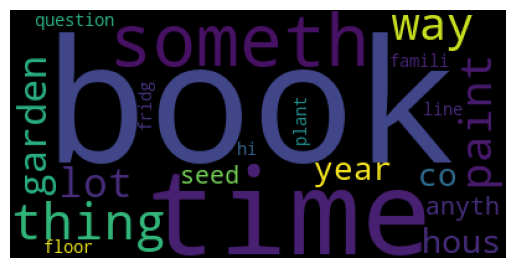

ABCNE


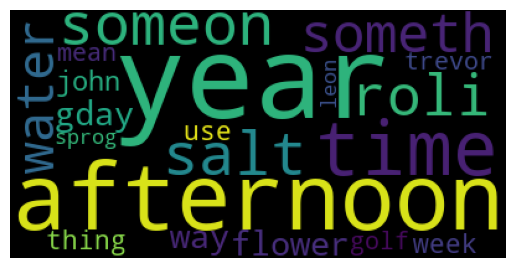

COME


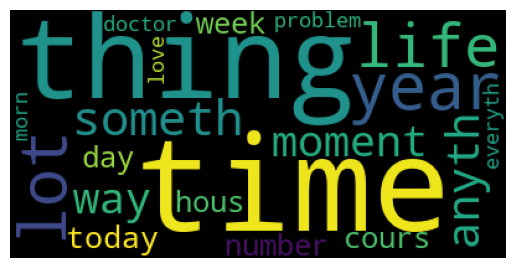

COMNE


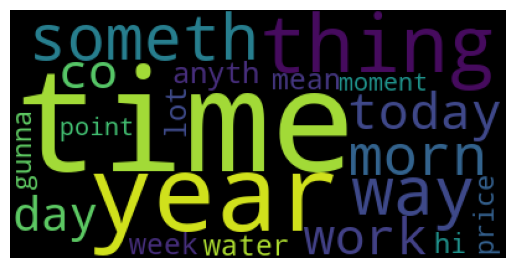

NAT


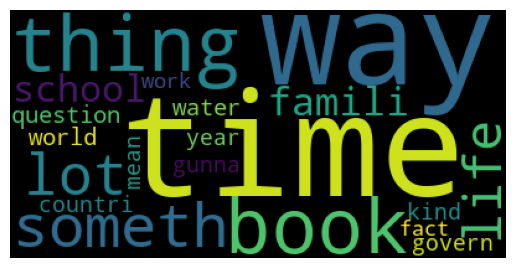

In [102]:
#Comparing Word counts extracting only nouns
custom_punctuation = "''""…""...""``" '"' '-' 
custom_stopwords = ["n", "c", "ih", "w", "uh", "um", "yes", "yeah","yknow", "well", "like", "okay", "that", "thats", "one", "got", "oh", "think", "good", "youre", "dont", "im", "get", "really", "theyre", "know", "ive", "say", "two", "three", "would", "right", "bit", "word", "thank", "hello", "youve", "sort", "look", "theres", "mm", "four", "five", "six", "seven", "eight", "nine", "ten", "b", "d", "co", "yep", "id"] 
preprocessor = TextPreprocessor(custom_punctuation, custom_stopwords)
word_freqs = {}

for index, row in df_combined.iterrows():
    processed = preprocessor.preprocess_keep_pos_tag(row['content'], {"NN"}) #NN = Noun
    word_freqs[row['prefix']] = get_word_frequencies(processed, top_n=20)

    print(row['prefix'])
    wordcloud = WordCloud(max_words=20).generate(processed)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# Combine word frequencies into a DataFrame
df_word_freqs = pd.DataFrame(word_freqs).fillna(0)

In [103]:
df_word_freqs

,ABCE,ABCNE,COME,COMNE,NAT
0,"(book, 64)","(year, 27)","(time, 197)","(year, 129)","(time, 149)"
1,"(time, 48)","(afternoon, 26)","(morn, 164)","(time, 121)","(way, 121)"
2,"(someth, 41)","(time, 21)","(thing, 144)","(thing, 85)","(thing, 105)"
3,"(thing, 40)","(salt, 13)","(number, 109)","(morn, 66)","(book, 100)"
4,"(way, 33)","(someon, 13)","(year, 101)","(way, 60)","(someth, 92)"
5,"(paint, 31)","(roli, 12)","(lot, 101)","(someth, 54)","(lot, 81)"
6,"(garden, 29)","(someth, 12)","(life, 91)","(today, 41)","(water, 80)"
7,"(lot, 25)","(water, 11)","(someth, 87)","(work, 41)","(world, 76)"
8,"(hous, 24)","(gday, 10)","(day, 80)","(co, 39)","(life, 68)"
9,"(co, 23)","(way, 10)","(anyth, 78)","(day, 38)","(famili, 60)"


**Common word analysis: Topical, only nouns kept in addition to more stop words used**)

Through using nltk’s pos_tag feature, we are able to filter out all non-noun words to achieve some targeted analysis on topics that are discussed throughout the radio transcripti

**Word Count Analysis (Nouns):**

Interesting to note that “time”, “year”, “morn/morning”, “afternoon”, “week”, “today” and “day” are very commonly used words. These are all “time-related” nouns and this does make sense as generally radios may discuss the daily events of the speakers, resulting in an increased use of time-related nouns to describe experiences and current ongoing events.

Other common nouns include “life”, “school” and “famili” (root of “family”) are also commonly discussed. Radios generally appeal to an older audience as young adults primarily use the internet to get their entertainment (podcasts on youtube for example). Research shows that the primary age range of radio listeners in Australia (in July 2023) was between 25 and 39, followed by 40-54 and 65+ (See Reference 1). The ages below 24 were substantially less when compared to older age ranges. Generally, after the age of 25 and when heading into the 30s age range, individuals will look towards settling down with family or having kids while being “working” adults, which were common keywords discovered in the analysis.

Following this analysis, the words “plant” and “garden” were also listed as common nouns, but only for the ABCE and COME channels. These channels are specific to Eastern Australia which compass generally Queensland and New South Wales. Interestingly enough, these two states are considered to have the best climate for plants but it's difficult to interpret how much of this is coincidence vs caus adjectives.
ons.


ABCE


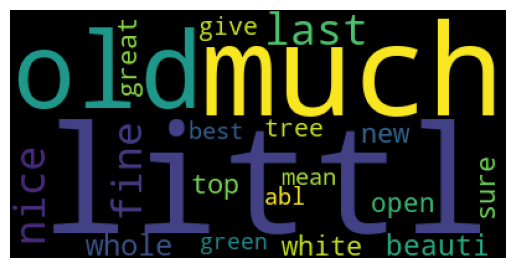

ABCNE


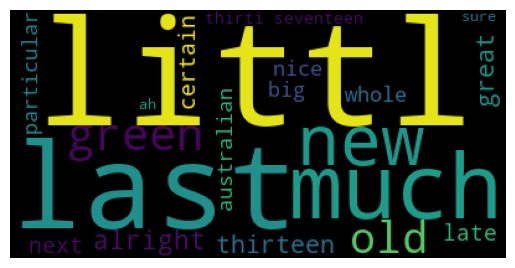

COME


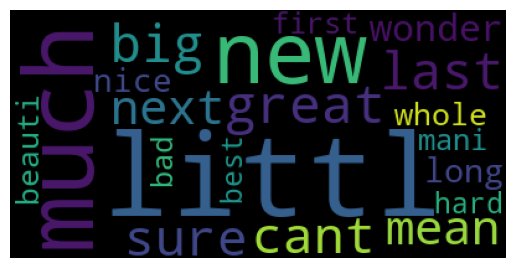

COMNE


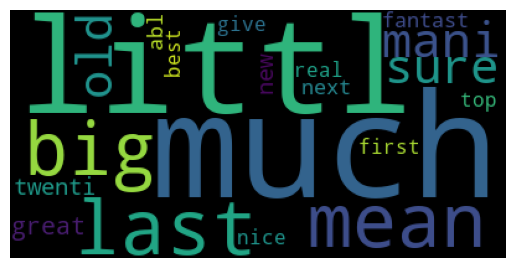

NAT


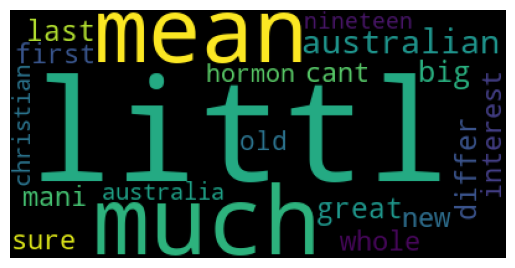

In [105]:
#Comparing Word counts extracting only Adjectives
custom_punctuation = "''""…""...""``" '"' '-' 
custom_stopwords = []
word_freqs = {}

for index, row in df_combined.iterrows():
    #JJ: adjective or numeral, ordinal
    #JJR: adjective, comparative
    #JJS: adjective, superlative
    processed = preprocessor.preprocess_keep_pos_tag(row['content'], {"JJ", "JJR", "JJS"}) 

    word_freqs[row['prefix']] = get_word_frequencies(processed, top_n=20)

    print(row['prefix'])
    wordcloud = WordCloud(max_words=20).generate(processed)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# Combine word frequencies into a DataFrame
df_word_freqs = pd.DataFrame(word_freqs).fillna(0)

In [106]:
df_word_freqs

,ABCE,ABCNE,COME,COMNE,NAT
0,"(littl, 49)","(littl, 23)","(littl, 135)","(much, 79)","(littl, 108)"
1,"(old, 39)","(last, 15)","(much, 91)","(littl, 67)","(much, 101)"
2,"(much, 34)","(much, 15)","(new, 72)","(doubl, 57)","(mean, 91)"
3,"(last, 24)","(new, 14)","(great, 64)","(last, 47)","(australian, 82)"
4,"(nice, 22)","(green, 11)","(big, 61)","(mean, 46)","(big, 64)"
5,"(fine, 21)","(old, 10)","(last, 61)","(big, 44)","(great, 64)"
6,"(whole, 21)","(alright, 10)","(cant, 59)","(mani, 42)","(last, 59)"
7,"(beauti, 19)","(great, 9)","(sure, 58)","(sure, 40)","(new, 59)"
8,"(top, 18)","(thirteen, 9)","(next, 53)","(old, 39)","(differ, 56)"
9,"(new, 18)","(seventeen, 8)","(mean, 53)","(great, 38)","(sure, 49)"


**Word Clouds: Adjectives Only**

Common adjectives show that “little” is nearly universally the most used adjective. Through examining the transcripts themselves, there are many cases of “little bit” being used and this has caused a large amount of use of the word “little” as a describe adjective.

One key word that appears within the top 20 adjectives used is the word “Christian”. This word is the 20th most used adjective for the National Australia Broadcast and it only appears within the list for NAT, suggesting that national radio could have more discussions that touch serious topics such as religion. It's still a very limited use of the word Christian, but other radio stations do not have any cases of words relating to religion appearing. Aside from this potential interpretation, there is not much in terms of differences that we can gather from commonly used adjectives.


In [108]:
#Bigrams

#Comparing Word counts extracting only Adjectives
custom_punctuation = "''""…""...""``" '"' '-' 
custom_stopwords = ["wanna"]
bigrams_dict = {}

for index, row in df_combined.iterrows():
    preprocessed = preprocessor.preprocess(row['content'])
    bigrams_list = list(bigrams(preprocessed.split()))
    bigram_counter = Counter(bigrams_list)   
    bigrams_dict[row['prefix']] = bigram_counter.most_common(10)

df_bigrams_dict = pd.DataFrame(bigrams_dict).fillna(0)

In [109]:
df_bigrams_dict

,ABCE,ABCNE,COME,COMNE,NAT
0,"((year, old), 11)","((thirteen, hundr), 12)","((wan, na), 57)","((wan, na), 58)","((wan, na), 40)"
1,"((wan, na), 11)","((hundr, thirti), 12)","((morn, morn), 34)","((doubl, doubl), 42)","((hormon, therapi), 32)"
2,"((root, system), 9)","((thirti, seventeen), 12)","((next, year), 27)","((year, old), 24)","((hundr, tripl), 30)"
3,"((build, consult), 9)","((seventeen, hundr), 12)","((bye, bye), 23)","((twenti, twenti), 22)","((let, go), 22)"
4,"((book, club), 9)","((hundr, number), 9)","((year, ago), 23)","((youll, find), 20)","((year, ago), 21)"
5,"((love, bone), 9)","((time, year), 7)","((let, go), 21)","((year, twelv), 19)","((children, book), 19)"
6,"((open, garden), 8)","((nelli, kelli), 7)","((come, back), 21)","((doubl, eighti), 18)","((twenti, year), 18)"
7,"((twenti, minut), 8)","((green, leav), 7)","((g, p), 20)","((year, ago), 17)","((tell, us), 18)"
8,"((steel, wool), 8)","((nake, ladi), 6)","((dr, graham), 19)","((last, year), 15)","((tripl, j), 18)"
9,"((take, call), 7)","((last, year), 6)","((thousand, dollar), 18)","((pot, mix), 14)","((australian, children), 17)"


In [110]:
#Trigrams

#Comparing Word counts extracting only Adjectives
custom_punctuation = "''""…""...""``" '"' '-' 
custom_stopwords = []
trigrams_dict = {}

for index, row in df_combined.iterrows():
    preprocessed = preprocessor.preprocess(row['content'])
    trigrams_list = list(trigrams(preprocessed.split()))
    trigram_counter = Counter(trigrams_list)   
    trigrams_dict[row['prefix']] = trigram_counter.most_common(10)

df_trigrams_dict = pd.DataFrame(trigrams_dict).fillna(0)

In [111]:
df_trigrams_dict

,ABCE,ABCNE,COME,COMNE,NAT
0,"((fourteen, year, old), 7)","((thirteen, hundr, thirti), 12)","((thirteen, thirteen, thirti), 13)","((doubl, doubl, eighti), 18)","((new, south, wale), 16)"
1,"((nineti, cabbag, tree), 6)","((hundr, thirti, seventeen), 12)","((put, back, switch), 10)","((doubl, doubl, doubl), 12)","((world, refuge, day), 13)"
2,"((cabbag, tree, road), 6)","((thirti, seventeen, hundr), 12)","((morn, dr, graham), 9)","((dot, com, dot), 8)","((give, us, call), 12)"
3,"((tree, road, bayview), 6)","((seventeen, hundr, number), 9)","((sharina, saturday, night), 9)","((com, dot, u), 8)","((australian, children, book), 10)"
4,"((open, garden, scheme), 5)","((nelli, kelli, passionfruit), 4)","((duh, duh, duh), 8)","((morn, harvey, morn), 6)","((bye, hundr, tripl), 10)"
5,"((twenti, minut, past), 5)","((k, e, e), 2)","((morn, morn, dr), 8)","((solvol, citru, soap), 6)","((australia, talk, back), 7)"
6,"((sydney, radio, across), 5)","((pull, someon, leg), 2)","((love, song, dedic), 8)","((citru, soap, pack), 6)","((eh, eh, eh), 7)"
7,"((radio, across, new), 5)","((club, st, andrew), 2)","((dot, com, dot), 7)","((terracotta, pot, mix), 6)","((australian, children, literatur), 7)"
8,"((across, new, south), 5)","((forecaddi, someon, went), 2)","((com, dot, u), 7)","((p, r, dot), 5)","((hormon, replac, therapi), 7)"
9,"((new, south, wale), 5)","((us, tilli, van), 2)","((bye, bye, bye), 6)","((r, dot, com), 5)","((tt, tt, tt), 7)"



**Engram analysis:**

As discussed before, the occurrence of “wanna” shows a use of colloquial language is very common. Bigrams such as “open garden”, “green leaves” show that gardening was a discussed topic (as mentioned before) for the ABCE (eastern australian) radio station. Combinations such as “Children book”, “book club”, "hormonal therapy” also suggest these radio discussions are targeted towards a more mature audience as opposed to the younger generation.

Similarly for Trigrams, There are 13 mentions of “world refugee day” by NAT which supports the previously discussed interpretation that the National Radio Station may cover more serious topics.

Now we group all the Non-commercial radio stations together and the commercial radio stations together and apply similar analysis.

As discussed before we can see that colloquial language (“y’know” and “gunna”) make common appearances in non-commercial radio transcripts, likely for the reason to make the radio station more relatable and appealing to a wider range of audiences.


In [113]:
df_combined['type'] = df_combined['prefix'].apply(lambda x: "COM" if x.startswith('COM') else 'non-COM')

#Group by prefix
df_combined_com = df_combined.groupby('type')['content'].apply(' '.join).reset_index()

In [114]:
df_combined_com

,type,content
0,COM,Good morning and welcome to another Two G B w...
1,non-COM,Thanks for that John Hall now John Hall will ...


In [115]:
#Applying previous investigations to see if there is a different between com and no-com
custom_punctuation = "''""…""...""``" '"' '-'  # Add any custom punctuation marks here
custom_stopwords = ["n", "c", "ih", "w"] 
preprocessor = TextPreprocessor(custom_punctuation, custom_stopwords)
word_freqs = {}

for index, row in df_combined_com.iterrows():
    processed = preprocessor.preprocess(row['content'])
    word_freqs[row['type']] = get_word_frequencies(processed, top_n=50)

# Combine word frequencies into a DataFrame
df_word_freqs = pd.DataFrame(word_freqs).fillna(0)

In [116]:
df_word_freqs

,COM,non-COM
0,"(uh, 2466)","(uh, 2636)"
1,"(um, 1159)","(um, 1540)"
2,"(well, 976)","(think, 706)"
3,"(yeah, 831)","(yeah, 654)"
4,"(got, 708)","(well, 650)"
5,"(that, 700)","(like, 606)"
6,"(go, 674)","(yknow, 579)"
7,"(like, 663)","(one, 539)"
8,"(good, 650)","(that, 502)"
9,"(get, 638)","(go, 477)"


In [117]:
#Comparing Word counts with more stop words 
custom_punctuation = "''""…""...""``" '"' '-'  # Add any custom punctuation marks here
custom_stopwords = ["n", "c", "ih", "w", "uh", "um", "yes", "yeah","yknow", "well", "like", "okay", "that", "thats", "one", "got", "oh", "think", "good", "youre", "dont", "im", "get", "really", "theyre", "know", "ive", "say", "two", "three", "would", "right", "bit", "word", "thank", "hello", "youve", "sort", "look", "theres", "mm", "four", "five", "six", "seven", "eight", "nine", "ten"] 
preprocessor = TextPreprocessor(custom_punctuation, custom_stopwords)
word_freqs = {}

for index, row in df_combined_com.iterrows():
    processed = preprocessor.preprocess(row['content'])
    word_freqs[row['type']] = get_word_frequencies(processed, top_n=20)

# Combine word frequencies into a DataFrame
df_word_freqs = pd.DataFrame(word_freqs).fillna(0)

In [118]:
df_word_freqs

,COM,non-COM
0,"(go, 674)","(go, 477)"
1,"(year, 394)","(peopl, 416)"
2,"(thing, 391)","(thing, 298)"
3,"(time, 361)","(book, 267)"
4,"(peopl, 298)","(mean, 261)"
5,"(back, 271)","(year, 250)"
6,"(mean, 263)","(time, 244)"
7,"(see, 248)","(come, 238)"
8,"(call, 247)","(actual, 230)"
9,"(want, 237)","(call, 224)"


COM


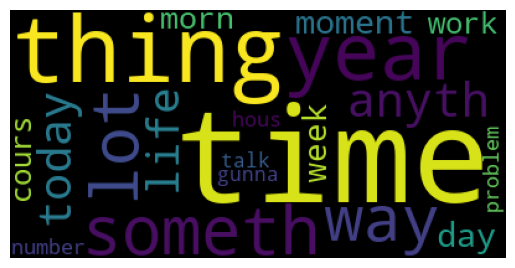

non-COM


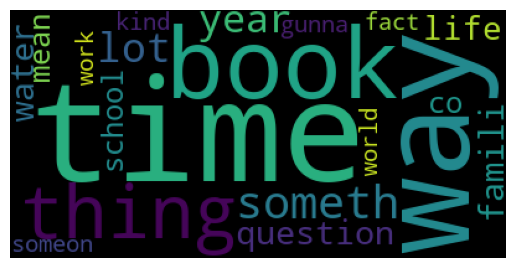

In [119]:
#Comparing Word counts extracting only nouns
custom_punctuation = "''""…""...""``" '"' '-' 
custom_stopwords = ["n", "c", "ih", "w", "uh", "um", "yes", "yeah","yknow", "well", "like", "okay", "that", "thats", "one", "got", "oh", "think", "good", "youre", "dont", "im", "get", "really", "theyre", "know", "ive", "say", "two", "three", "would", "right", "bit", "word", "thank", "hello", "youve", "sort", "look", "theres", "mm", "four", "five", "six", "seven", "eight", "nine", "ten", "b", "d", "co", "yep", "id"] 
preprocessor = TextPreprocessor(custom_punctuation, custom_stopwords)
word_freqs = {}

for index, row in df_combined_com.iterrows():
    processed = preprocessor.preprocess_keep_pos_tag(row['content'], {"NN"}) #NN = Noun
    word_freqs[row['type']] = get_word_frequencies(processed, top_n=20)

    print(row['type'])
    wordcloud = WordCloud(max_words=20).generate(processed)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# Combine word frequencies into a DataFrame
df_word_freqs = pd.DataFrame(word_freqs).fillna(0)

In [120]:
df_word_freqs

,COM,non-COM
0,"(time, 318)","(time, 218)"
1,"(morn, 230)","(book, 165)"
2,"(year, 230)","(way, 164)"
3,"(thing, 229)","(thing, 154)"
4,"(someth, 141)","(someth, 145)"
5,"(lot, 138)","(lot, 111)"
6,"(number, 135)","(year, 105)"
7,"(way, 130)","(water, 103)"
8,"(day, 118)","(question, 83)"
9,"(anyth, 115)","(famili, 80)"


COM


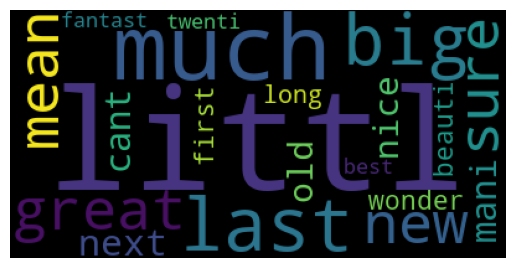

non-COM


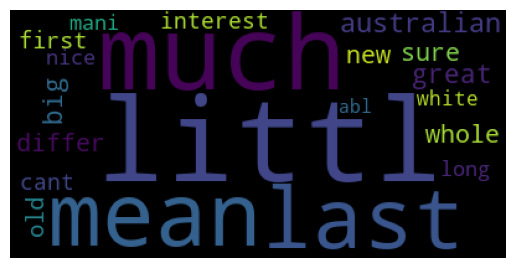

In [121]:
#Comparing Word counts extracting only Adjectives
custom_punctuation = "''""…""...""``" '"' '-' 
custom_stopwords = []
word_freqs = {}

for index, row in df_combined_com.iterrows():
    #JJ: adjective or numeral, ordinal
    #JJR: adjective, comparative
    #JJS: adjective, superlative
    processed = preprocessor.preprocess_keep_pos_tag(row['content'], {"JJ", "JJR", "JJS"}) 

    word_freqs[row['type']] = get_word_frequencies(processed, top_n=20)

    print(row['type'])
    wordcloud = WordCloud(max_words=20).generate(processed)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# Combine word frequencies into a DataFrame
df_word_freqs = pd.DataFrame(word_freqs).fillna(0)

In [122]:
df_word_freqs

,COM,non-COM
0,"(littl, 202)","(littl, 180)"
1,"(much, 170)","(much, 150)"
2,"(last, 108)","(mean, 106)"
3,"(new, 108)","(last, 98)"
4,"(big, 105)","(new, 91)"
5,"(great, 102)","(great, 91)"
6,"(mean, 99)","(old, 89)"
7,"(sure, 98)","(australian, 89)"
8,"(doubl, 86)","(big, 81)"
9,"(next, 82)","(whole, 75)"


Commercial vs Non-Commercial

Regarding noun word counts, there is not much of any notable differences or standouts created depending on whether a radio station was commercial vs non-commercial.

Finally the only notable difference between non-commercial radio stations and commercial stations is the word “australian” appeared as the 8th most common noun, likely due to non-commercial radio stations discussing Australia related topics, perhaps world events or current controversies.



In summary, there are some potential differences created by the nature of the radio stations: their audiences, who they are broadcasted to and whether they are non-commercial or commercial. This analysis investigated, discussed and explored some of these cases throughout the dataset and the conclusion is that the audience and location of broadcast can affect the way language is used (colloquial language) and the topics discussed, meanwhile commercial vs non-commercial radio stations did not have any drastic difference between them.

**References:**

1. [Australia: number of radio listeners by age group 2023 | Statista](https://www.statista.com/statistics/1412852/australia-number-of-radio-listeners-by-age-group/#:~:text=Number%20of%20radio%20listeners%20by%20age%20group%20in%20Australia%202023&text=In%20a%202023%20survey%20about,million%20between%2055%20and%2064.)